In [130]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [131]:
iris = load_iris()

In [132]:
X = iris.data

In [133]:
y = iris.target

In [134]:
# df = pd.DataFrame(X)
# df['Target'] = y
# df

In [135]:
# df=df.sample(frac=1)
# df

In [136]:
# df['Target']

In [137]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [138]:
knn = KNeighborsClassifier( n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [139]:
predict = knn.predict(X_test)

In [140]:
accuracy = accuracy_score(y_test,predict)
print("Accuracy Score:", accuracy)

Accuracy Score: 1.0


In [141]:
cm = confusion_matrix(y_test,predict)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

<Axes: >

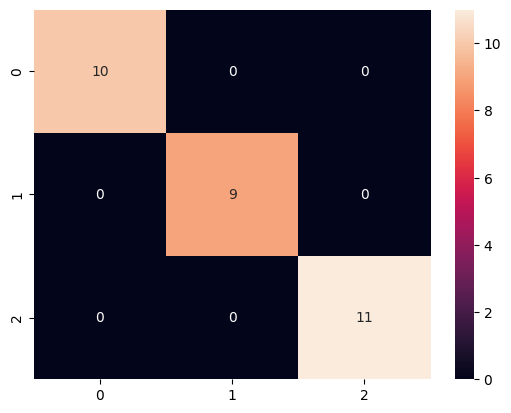

In [142]:
sns.heatmap(confusion_matrix(y_test,predict), annot = True)

In [143]:
cr = classification_report(y_test,predict)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



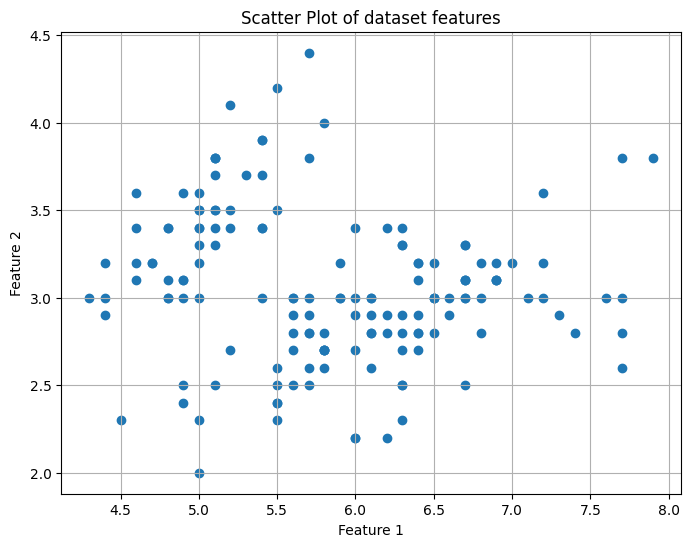

In [144]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.title('Scatter Plot of dataset features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

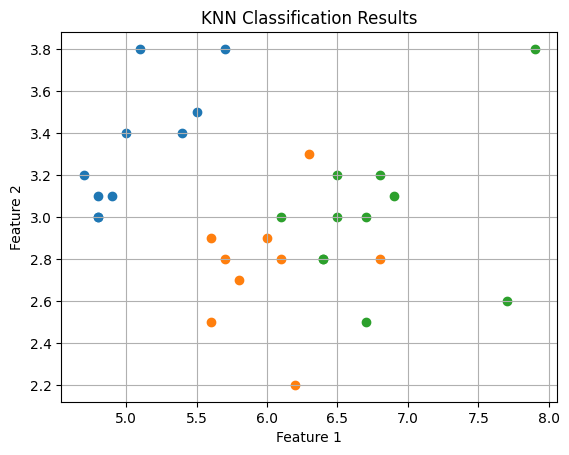

In [145]:
for label in np.unique(y_test):
    plt.scatter(X_test[y_test == label, 0], X_test[y_test == label, 1], label=f'Class {label}')

plt.title('KNN Classification Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [146]:
kf = KFold(n_splits=5, shuffle = True ,random_state=42)

In [147]:
cv_score = cross_val_score(knn, X,y,cv = kf)
print(cv_score)
print(np.mean(cv_score))

[1.         1.         0.96666667 0.93333333 0.96666667]
0.9733333333333334


In [148]:
param = {'n_neighbour':[3,5,7,9,11],
        'weights':['uniform','distance'],
        'metrics':['euclidean', 'manhattan']}

In [149]:
g_search = GridSearchCV(knn,param,cv = 2)